In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from sav.utils.preprocess import covert_annot_to_binary_list

covert_annot_to_binary_list('data/NLM9/framboid', 'data/NLM9/framboid/annotation', 'png')

conversion completed for data/NLM9/framboid/A3D_cauliflower_0001-NLM0001_mask.png.
conversion completed for data/NLM9/framboid/A3D_cauliflower_0001-NLM0201_mask.png.
conversion completed for data/NLM9/framboid/A3D_cauliflower_0001-NLM0401_mask.png.
conversion completed for data/NLM9/framboid/A3D_cauliflower_0001-NLM0601_mask.png.
conversion completed for data/NLM9/framboid/A3D_cauliflower_0001-NLM0801_mask.png.
conversion completed for data/NLM9/framboid/A3D_cauliflower_0001-NLM1001_mask.png.


--- Logging error ---
Traceback (most recent call last):
  File "/home/tung/anaconda3/envs/torchv2/lib/python3.9/logging/__init__.py", line 1087, in emit
    self.flush()
  File "/home/tung/anaconda3/envs/torchv2/lib/python3.9/logging/__init__.py", line 1067, in flush
    self.stream.flush()
OSError: [Errno 28] No space left on device
Call stack:
  File "/home/tung/anaconda3/envs/torchv2/lib/python3.9/threading.py", line 937, in _bootstrap
    self._bootstrap_inner()
  File "/home/tung/anaconda3/envs/torchv2/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/home/tung/anaconda3/envs/torchv2/lib/python3.9/site-packages/wandb/sdk/internal/internal_util.py", line 49, in run
    self._run()
  File "/home/tung/anaconda3/envs/torchv2/lib/python3.9/site-packages/wandb/sdk/internal/internal_util.py", line 100, in _run
    self._process(record)
  File "/home/tung/anaconda3/envs/torchv2/lib/python3.9/site-packages/wandb/sdk/internal/internal.py", line 279, in _pro

In [25]:
from patchify import patchify, unpatchify
import numpy as np
from PIL import Image, ImageOps

def downsample_and_pad(img: "PIL.Image", 
                       patch_size, 
                       down_sampling:int
                      ) -> "PIL.Image":
    resized_img = img.resize((img.size[0]//down_sampling, img.size[1]//down_sampling))
    width, height = resized_img.size
    size_width = patch_size[0]*(width//patch_size[0]+1)
    size_height = patch_size[1]*(height//patch_size[1]+1)
    padded_img = ImageOps.pad(resized_img, size=(size_width, size_height))
    return padded_img

x = Image.fromarray(np.ones((1095,2061)))
y = downsample_and_pad(x, (256,256), 2)
y.size

(1280, 768)

In [225]:
wandb.finish()

epoch,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
metric/mean_iou_cauliflower_FeO,▅▂▅▁▅▆▅▆▄▅▄▆▄▆▅▇▆▆▇▇▆▇▇▆▄▆▇▇█▇▇▇▇▇▇██▇▇█
metric/mean_iou_cauliflower_FeS,▆▁▅▁▆▅▆▅▄▆▆▆▆▇▆▆▇▆▆▆▇▇▇▇▆▇▆▇▇▇▇█▅▆▇█▇▇▆▇
metric/mean_iou_cauliflower_cauliflower,▅▁▅▁▃▄▄▅▅▄▅▅▄▅▆▆▅▆▆▆▆▇▅▇▇▇▇█▆▅▇▇██▇▇▇▅▇▅
metric/mean_iou_cauliflower_magnitite,▆▁▅▁▄▅▄▇▄▅▆▇▇█▄▇▇▆▆█▇█▇▇▇▇▇▇▇▆▆▇██▇▇████
train/iou,▅▅▅▁▃▅▇▅▅█▅▇█▅▇▇▇█▄█▄▆▅▇▆▆▇▇█▇▇▇▆█▇█▇█▇▇
train/loss,▅▅▅█▃▅▂▂▄▄▅▂▃▂▃▃▅▃▂▁▂▁▆▁▂▂▃▂▂▂▁▁▂▂▁▁▂▂▅▂
trainer/global_step,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▄▂▂▅▂▂▆▂▂▂▇▂▂▇▂▂█▂▂▂▂▂
val/epoch_val_iou,▆▁▅▁▄▅▅▆▄▅▆▆▆▆▆▇▇▆▇▇▇███▇▇█▇█▇▇█████████
val/epoch_val_loss,██▆█▆▇▆▅▃▅▃▃▅▃▃▂▂▃▃▃▁▂▂▁▂▂▂▂▂▁▂▁▁▂▁▂▁▁▁▂
val/val_iou_epoch,▆▁▅▁▄▅▅▆▄▅▆▆▆▆▆▇▇▆▇▇▇███▇▇█▇█▇▇█████████


In [167]:
from sav.utils.preprocess import make_binary_mask_dir

make_binary_mask_dir("data/cauliflower/cauliflower_structure/annotation")

data/cauliflower/cauliflower_structure/annotation/channel1_slice_151.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_151.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_199.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_199.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_600png.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_600png.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_100.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_100.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_800.tiff
save the binary mask to data/cauliflower/cauliflower_structure/annotation/channel1_slice_800.tiff
data/cauliflower/cauliflower_structure/annotation/channel1_slice_1000.tiff
save the binary mask to data/cauliflower/cauliflower_struct

In [18]:
import PIL.Image as Image
path = "data/cauliflower/FeS/annotation/channel1_slice_800.tiff"
Image.open(path)
# ImageOps.flip(Image.open(path)).save(path)

ValueError: Could not save to PNG for display

<PIL.TiffImagePlugin.TiffImageFile image mode=F size=2048x1536>

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

a = np.array(Image.open("data/apollo_70017/phase_3/image/0424.tiff"))
b = np.array(Image.open("data/apollo_70017/phase_3/annotation/0424.tiff"))

fig, axs = plt.subplots(1,1,figsize=(6,6),dpi=300)
plt.imshow(a, cmap='gray')
plt.imshow(b, cmap='cividis',alpha=0.1)

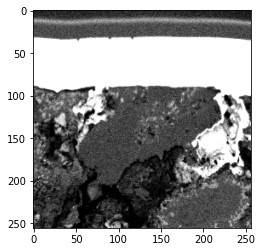

In [74]:
import torch
import torchvision.transforms.v2 as transforms
import PIL.Image as Image
import matplotlib.pyplot as plt

test_img = Image.open('test_data/cauliflower2/channel1_slice_510.tiff')
T = transforms.Compose([transforms.ToTensor(),
                        transforms.ScaleJitter((2048,1536),scale_range=(0.125,1)),
                        transforms.RandomCrop(size=(256,256),pad_if_needed=True),],
                        )
out_img = T(test_img).numpy().squeeze()
plt.imshow(out_img, cmap='gray')

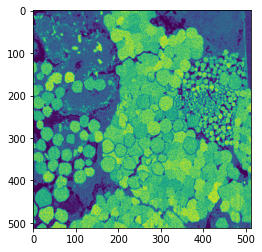

In [52]:
from skimage.filters import gaussian
import numpy as np

back_img = Image.open('test_data/cauliflower_magnetite_sup/image/300_x1500y600.tiff')
back_mask = Image.open('test_data/cauliflower_magnetite_sup/annotation/300_x1500y600.tiff')
test_img = Image.open('test_data/cauliflower_magnetite_sup/image/300_x750y700.tiff')
test_mask = Image.open('test_data/cauliflower_magnetite_sup/annotation/300_x750y700.tiff')
back_img, back_mask, test_img, test_mask = np.array(back_img), np.array(back_mask),np.array(test_img), np.array(test_mask)

def image_copy_paste(img, paste_img, alpha, blend=True, sigma=1):
    if alpha is not None:
        if blend:
            alpha = gaussian(alpha, sigma=sigma, preserve_range=True)

        img_dtype = img.dtype
        # alpha = alpha[..., None]
        img = paste_img * alpha + img * (1 - alpha)
        img = img.astype(img_dtype)
    return img

out_img = image_copy_paste(np.array(back_img), np.array(test_img), np.array(test_mask))
plt.imshow(out_img)

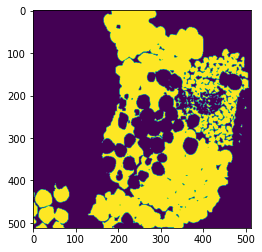

In [62]:
def mask_copy_paste(mask, paste_mask):
    if paste_mask is not None:
        #eliminate pixels that will be pasted over
        mask = np.logical_and(mask, np.logical_xor(mask, paste_mask)).astype(np.uint8)
    return mask

out_mask = mask_copy_paste(back_mask,test_mask)
plt.imshow(out_mask)

In [4]:
import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks.progress import RichProgressBar
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger
from sav.datamodule import DatamoduleSAV
from sav.module.fs_segmenter import FewShotSegmenter
import wandb
wandb.login()

args = dict(# checkpoint
            seed=0, 
            num_epoch=200,
            checkpoint_path='checkpoints/20231003_256_nlm9',
            model_name='Avgpool',
            version='0',
            precision_for_training=16,
    
            # for model
            backbone='vgg16', 
            optimizer='adam', 
            learning_rate=1e-4, 
            weight_decay=1e-5,
    
            # for datamodule
            datapath='data',
            nshot=3,
            nsamples=500,
            contrast=(0.5,1.5),
            rotation_degrees=90.0,
            scale=(0.25,0.75),
            crop_size=256,
            val_data_ratio=0.15,
            batch_size=5,
            n_cpu=4,
            )

# Set Logger
logger = WandbLogger(save_dir="lightning_logs",
                     project="slice-and-view_cauliflower_nlm9",)
                     # id='25wrvgh9', resume='must')

# Set checkpoints paths
checkpoint_callback = ModelCheckpoint(
                            save_top_k=5,
                            monitor="val/val_loss", # val/epoch_val_iou
                            # every_n_epochs=5,
                            mode="min",
                            dirpath=args['checkpoint_path'],
                            filename= args['model_name'] + "-{epoch:02d}",
                         )

wandb: Currently logged in as: poyentung. Use `wandb login --relogin` to force relogin
wandb: WARNING Path lightning_logs/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path lightning_logs/wandb/ wasn't writable, using system temp directory


In [5]:
pl.seed_everything(args['seed'])

datamodule = DatamoduleSAV(datapath=args['datapath'], 
                           nshot=args['nshot'],
                           nsamples=args['nsamples'],
                           # img_sizes=args['img_sizes'],
                           contrast=args['contrast'],
                           rotation_degrees=args['rotation_degrees'],
                           scale=args['scale'],
                           crop_size=args['crop_size'],
                           val_data_ratio=args['val_data_ratio'],
                           batch_size=args['batch_size'],
                           n_cpu=args['n_cpu'])

model = FewShotSegmenter(backbone=args['backbone'], 
                         optimizer=args['optimizer'], 
                         learning_rate=args['learning_rate'],
                         weight_decay=args['weight_decay']
                        )#.load_from_checkpoint('_cauliflower3_filled_p=0.2/checkpoints/_cauliflower3_filled_p=0.2/last.ckpt') 
#_cauliflower_6_slices/checkpoints/_cauliflower_6_slices/last.ckpt
#checkpoints/20230411_256_copy_paste/Avgpool-epoch=194.ckpt

# cauli_apollo/checkpoints/cauli_apollo/last.ckpt
# checkpoints/20230411_256_copy_paste/Avgpool-epoch=194.ckpt

# trainer = pl.Trainer(max_epochs=args['num_epoch'], 
#                      callbacks=[RichProgressBar(),checkpoint_callback],
#                      logger=logger, 
#                      precision=args['precision_for_training'],
#                      accelerator='gpu', 
#                      devices=1,
#                      resume_from_checkpoint='checkpoints/20230411_256_copy_paste/Avgpool-epoch=121.ckpt')

# trainer.fit(model, datamodule)

Global seed set to 0


FileNotFoundError: [Errno 2] No such file or directory: 'data/NMM9/framboid/image'

In [121]:
from sav.utils.annotator import Annotator
from torchvision import transforms

model.to(device="cpu")
annotator = Annotator(model=model.to(device="cpu"),
                      down_sampling= 2,
                      patch_width= 224,
                      patch_height= 224,
                      margin= 32,
                      batch_size= 1)

# resize=(768,1024),
#                       patch_width=256, 
#                       patch_height=256,
#                       margin=24,
#                       batch_size=3


# out = annotator(query_img_path = "test_data/cauliflower2/channel1_slice_510.tiff",
#                 support_imgs_dir = "test_data/cauliflower_magnetite_sup/image",
#                 support_annots_dir = "test_data/cauliflower_magnetite_sup/annotation" )
out = annotator(query_img_path = "test_data/cauliflower3/channel1_slice_00004.tiff",
                support_imgs_dir = "test_data/cauliflower3_plaquette/image",
                support_annots_dir = "test_data/cauliflower3_plaquette/annotation")

(-0.5, 1119.5, 895.5, -0.5)

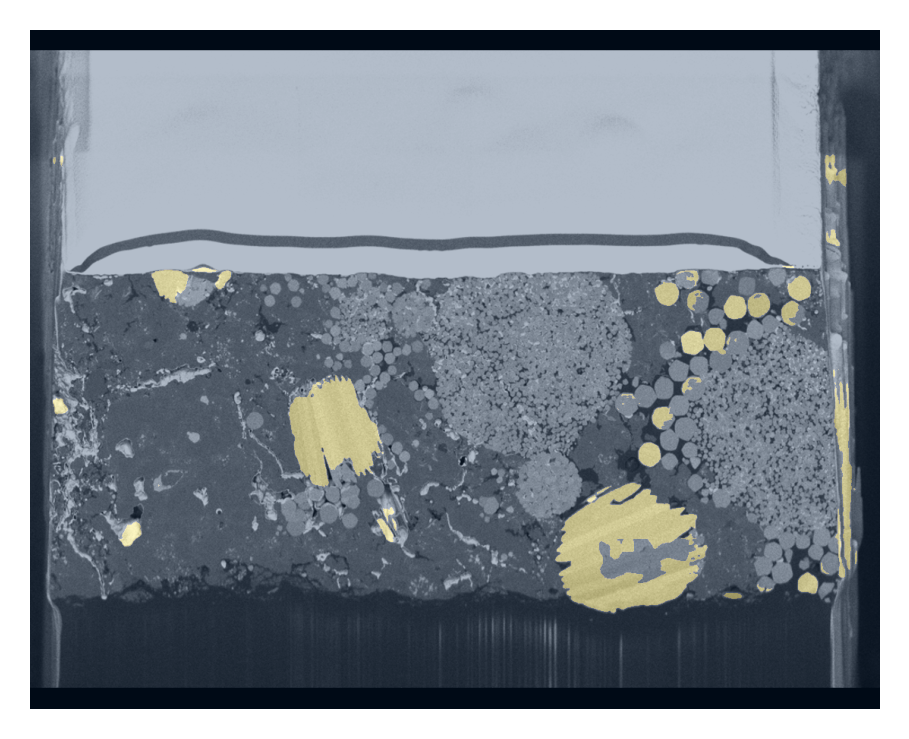

In [122]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1,1,figsize=(4,3),dpi=300)
axs.imshow(out['raw'],cmap='gray')
# axs.imshow(out['annot'], alpha=0.5, cmap='cividis')
axs.imshow(np.where(out['annot']>0.5,1,0), alpha=0.3, cmap='cividis')
axs.axis("off")

In [21]:
from sav.utils.visual import eval_model
from sav.datamodule import DatasetSAV

dataset = DatasetSAV(datapath='data', 
                     nshot=3,
                     nsamples=100,
                     rotation_degrees=90,
                     crop_size=768)

eval_model(module=model, 
               dataset=dataset, 
               phase_dir='data/cauliflower/magnitite',
               cmap_annot='cividis',
               cmap_annot_hat='cividis')

KeyboardInterrupt: 

In [45]:
out = annotator(query_img_path = "test_data/cauliflower2",
                support_imgs_dir = "test_data/cauliflower2_sup/image",
                support_annots_dir = "test_data/cauliflower2_sup/annotation",
                save_dir = "test_data/cauliflower2_mask")

Output()

In [8]:
annotator(query_img_path = "test_data/cauliflower2",
          support_imgs_dir = "test_data/cauliflower2_sup/image",
          support_annots_dir = "test_data/cauliflower2_sup/annotation",
          save_dir = "test_data/cauliflower2_mask")

Output()